# Exercises Week 11-12: Graded exercise session (part B)

**Course**: [Life Sciences engineering: genome to function](https://go.epfl.ch/BIO-411) (BIO-411)

**Professors**:  _Gönczy Pierre_, _Naef Felix_, _McCabe Brian Donal_

SSV, MA, 2023-2024

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from scipy.stats import beta
import math

**Provide answers in the form of code, figures (if relevant) and short descriptions (in markdown cells) in those notebooks. Submit your notebook to Moodle, please make sure to execute every cell.**

### Exercise 1: Simulation of circadian gene regulation

In this exercise, we revisit and extend the concepts from Week 9, focusing on the transcription and splicing of a pre-mRNA to produce mRNA. We describe this process using a two-dimensional Ordinary Differential Equation (ODE), similar to our previous approach but with a key difference: we now incorporate **time-dependent** transcription and degradation rates to model circadian rhythms.

The system is defined by the following ODEs:

\begin{array}{ll}
\frac{dP}{dt} = s(t) - \rho P \\  
\\
\frac{dM}{dt} = \rho P - k(t) M \\
\end{array}

where  $P$ and $M$ represent the concentrations of pre-mRNA and mRNA, respectively. We will consider time-dependent (circadian) transcription and degradation rates. The frequency is defined by $\omega=\frac{2\pi}{T}$ with $T=24h$.  

$s(t)$ is the transcription rate, which is now taken either as constant $s(t)=s_{0}$ or as a rhythmic function of time:  

\begin{equation*}
s(t) = s_0(1 + \epsilon_s \cos(\omega t)) 
\end{equation*}  
with relative amplitude $0\leq \epsilon_s\leq 1$. Note that the peak of $s(t)$ is at $t=0$.  
 
Similarly, we will consider the degradation rate $k(t)$ either as constant $k(t)= k_0$ or a rhythmic function of time:  
\begin{equation*}
k(t)=k_0(1 + \epsilon_k \cos(\omega (t-t_k))
\end{equation*}  
with $0\leq\epsilon_k\leq 1$, and the maximum degradation rate at $t=t_k$.

$\rho$ represents the constant splicing rate of pre-mRNA $P$ into mRNA $M$.

### Question 1
1. Adapt the code from Week 9 exercises to simulate this system with rhythmic transcription and degradation rates. Modify the interactive widget such that you can vary the new parameters and plot $P(t)$ and $M(t)$.  

2. Keep the degradation rate constant (set $\epsilon_k$=0) and vary $k_0$ and $\epsilon_s$.
    * How does the phase delay between $M(t)$ and $P(t)$ changes with different values of $k_0$?
    * How does the amplitude (use the ratio between max and min) of $M(t)$ changes with different values of $k_0$? 
    
    Make sure you span a relevant range for $k_0^{-1}$ ( *i.e.* from 10 minutes to several hours).  

3. Now introduce rhythmic degradation by varying $\epsilon_k$. 
    * Show that you can obtain a rhyhtmic mRNA accumulatiokn when the synthesis is constant ($\epsilon_s=0$). 
    * Explore and discuss scenarios where the introduction of rhythmic degradation leads to dynamics that cannot be achieved with a constant half-life.  
    
    See also [Wang et al., 2018](https://www.pnas.org/doi/10.1073/pnas.1715225115).

In [35]:
def production_decay_ode(y, time, rho, s0, es, k0, ek, tk ):

    """
    Defines the ODEs for the production and decay of pre-mRNA and mRNA.
    P: pre-mRNA concentration
    M: mRNA concentration
    st: transcription rate (time dependent)
    kt: mRNA degradation rate (time dependent)
    rho: splicing rate
    s0: transcription constant
    es: relative amplitude of the transcription rate oscillation
    ek: relative amplitude of the mRNA degradation rate oscillation
    k0: degradation constant
    time: time point (in minutes)
    tk: max degrade rate

    #kp: pre-mRNA degradation rate
    #km: mRNA degradation rate
    #tau: protein synthesis rate
    #kg: protein degradation rate
    """
    omega = 2*np.pi/(24*60)
    P, M = y
    st = s0*(1+es*math.cos(omega*time))
    kt = k0*(1+ek*math.cos(omega*(time-tk)))
    dPdt = st - rho*P
    dMdt = rho*P - kt*M
    return [dPdt, dMdt] 

def simulation(ode_function, parameters, initial_conditions = None, time = None):

    """
    Simulate the ODEs for the production and decay of pre-mRNA and mRNA.
    parameters: parameters for the ODEs
    initial_conditions: initial conditions for the ODEs
    time: time intervals for the simulation
   
    s = parameters['s']
    kp = parameters['kp']
    km = parameters['km']
    rho = parameters['rho']
    tau = parameters['tau']
    kg = parameters['kg']
    """
    
    
    
    rho= parameters['rho']
    s0= parameters['s0']
    es= parameters['es']
    k0= parameters['k0']
    ek= parameters['ek']
    #time= parameters['time']
    tk= parameters['tk']
    
    #omega = 2*np.pi/(24*60)
    #st = s0*(1+es*math.cos(omega*time))
    #kt = k0*(1+ek*math.cos(omega*(time-tk)))
    # Placeholder for adding steady-state solutions

    P_ss = s0 / rho #Add your steady-state solution for P here 
    M_ss = s0 / k0 #Add you steady-state solution for M here
    
    #results = odeint(ode_function, initial_conditions, time, args=(rho, s0, es, k0, ek, tk))
    results = odeint(ode_function, initial_conditions, time, args=(rho, s0, es, k0, ek, tk))

    plt.figure(figsize=(10, 6))
    plt.ylim([0,150])

    # Uncomment the lines below after adding your steady-state solutions
    plt.axhline(y=P_ss, color='blue', linestyle='--', label='P_ss')  
    plt.axhline(y=M_ss, color='orange', linestyle='--', label='M_ss')

    plt.title('Simulation of pre-mRNA and mRNA Production-Decay Dynamics')
    plt.plot(time, results[:, 0], label = 'P(t)', linewidth=2)
    plt.plot(time, results[:, 1], label = 'M(t)', linewidth=2)
    plt.legend()

    plt.twinx()
    plt.plot(time, results[:, 2], label = 'G(t)', linewidth=2, color='green') 
    plt.ylim([0,4000])

    plt.xlabel("Time [min]")
    plt.ylabel("Concentration")
    plt.legend(loc='upper left')
    plt.show()
    
def animate(initial_conditions, time, rho=0.4, s0=5, es=1, k0=0.05, ek=1, tk=0.5 ):
    """
    Runs the simulation with an interactive widgets for parameter exploration.
    """
    #args=(rho, s0, es, k0, ek, time, tk )
    parameters = {'rho':rho, 's0':s0, 'es':es, 'k0':k0, 'ek':ek, 'tk':tk}
    simulation(production_decay_ode, parameters, initial_conditions, time)


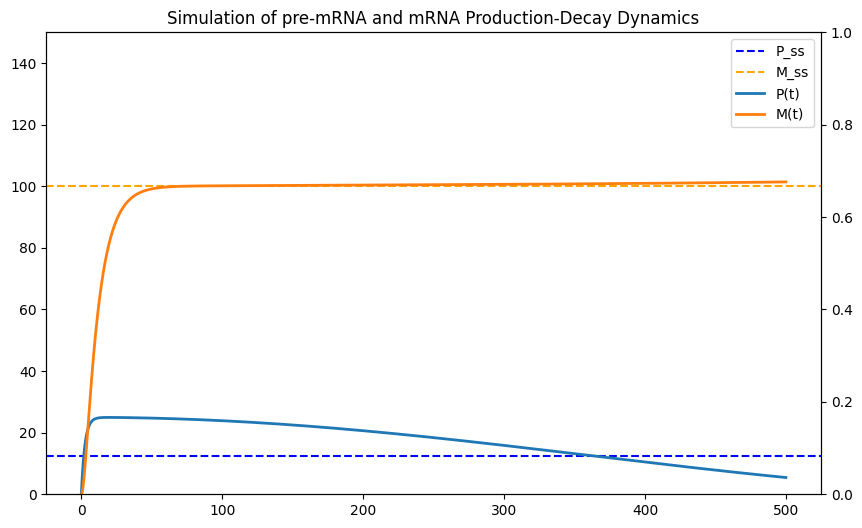

interactive(children=(FloatSlider(value=0.4, description='rho', max=1.0), FloatSlider(value=5.0, description='…

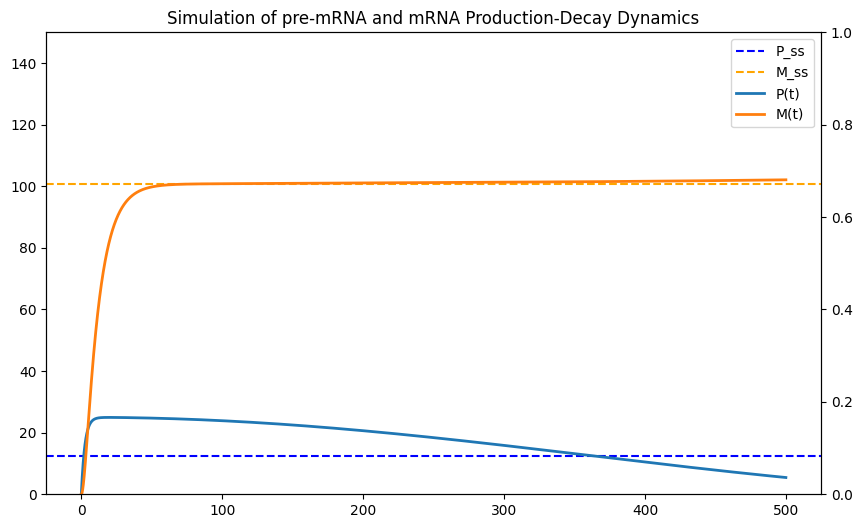

In [36]:
# Define initial conditions and time intervals for the simulation
initial_conditions = [0, 0] #[P, M, G]
time = np.linspace(0, 500, 10001)

interact(animate, 
         initial_conditions=fixed(initial_conditions), 
         time=fixed(time), 
        rho=(0, 1, 0.1),
        s0=(0, 10, 0.1),
        es=(0, 1, 0.1),
        k0=(1/600,1/10,1/1000),
        ek=(0, 1, 0.1),
        tk=(0, 1, 0.1));

### Exercise 2: Circadian (post-)transcriptional regulation of gene expression in mouse liver

In this exercise, we will analyse published RNA-seq data from mouse liver under an *ad libitum* feeding regimen and in presence of a 12-hour light-dark cycle ([Atger et al., 2015](https://www.pnas.org/doi/abs/10.1073/pnas.1515308112)). The samples were harvested every 2 hours in four replicates, RNA was extracted and sequenced. Similarly to Week 9 exercises on RNA-seq data, gene expression was quantified at the intron and exon levels. Note that data are $log_2$ transformed and normalized (RPKM).

### Question 1
1. Modify the code from Week 9 exercises to perform PCA using the 14 following genes (core clock genes and selected clock output genes):  
 ``['Arntl', 'Npas2', 'Clock', 'Cry1', 'Cry2', 'Per1', 'Per2', 'Per3', 'Nr1d1', 'Nr1d2', 'Rora', 'Rorc', 'Tef', 'Dbp']``.  
 First start with only the exons, then only the introns, and eventually both. Describe your observations.  

2. Use the *return_amp_phase_pv* function on the $log_2$ data to assess and characterize rhythmicity genome-wide.
    * Select genes based on p-value ($p<0.01) and amplitude (log2 fold-change>0.5) thresholds for further analysis.
    * Provide histograms of the peak times, and amplitudes ($log_2$ peak-to-trough) for the selected genes.
    * Perform this analysis separately for the exons and introns.
    * Examine whether you observe patterns typically referred to as the 'morning' and 'evening' waves of gene expression.
    
3. Determine which genes show the highest amplitude rhythmic patterns. Are there any common themes or characteristics among these genes?

#### Load the RNA-seq data

In [ ]:
dat = pd.read_csv("./GSE73554_WT_AL_Intron_Exon_RFP.txt",sep='\t')
dat.index = dat['Gene_Symbol']
dat = dat.drop(['Gene_Symbol','Gene_Ensembl'], axis=1)
dat.columns = dat.columns.str.split('_', expand = True)
dat.columns.names = ['condition','feeding','feature','time','replicate']

dat.head()

#### Assess rhythmicity

In [ ]:
# Function to infer the p-value, phase, amplitude and mean from a time-serie y with size N, period T and sampling Ts. 
def return_amp_phase_pv(y, Ts, T, N):
    
    """
    Perform harmonic regression using a Fourier series to infer the amplitude, phase, p-value, and mean from a time series.

    Parameters:
    y: Time series data.
    Ts: Sampling interval.
    T: Period of the time series.
    N: Number of data points in the time series.

    Returns:
    tuple: A tuple containing amplitude, phase, p-value, and mean of the time series.

    Notes:
    - The function uses Fast Fourier Transform (FFT) to decompose the time series.
    - Harmonic regression is performed to fit a cosine wave to the data.
    - The p-value is calculated based on the fit statistics, providing an estimate of the fit quality.
    """
      
    # Time vector for the series
    t = np.linspace(0.0, N * Ts, N)

    # Fourier Transform
    x_fft = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), d=Ts)

    # Identify the frequency closest to 1/T
    index, = np.where(np.isclose(freq, 1/T, atol=0.005))

    # Calculate amplitude and phase
    amp = 4 / N * np.abs(x_fft[index[0]])
    phase = T * np.arctan2(-x_fft[index[0]].imag, x_fft[index[0]].real) / (2 * np.pi)

    # Mean of the time series
    mu = 1 / N * x_fft[0].real
    
    # Harmonic regression to compute residuals and statistics
    x_hat = mu + 0.5 * amp * np.cos(2 * np.pi / T * t - 2 * np.pi * phase / T)
    res = y - x_hat
    sig2_1 = np.var(res)
    sig2 = np.var(y)
    R2 = 1 - sig2_1 / sig2

    # Compute p-value
    p = 3
    pval = 1 - beta.cdf(R2, (p - 1) / 2, (N - p) / 2)

    # Adjust phase to be within [0, T]
    if phase < 0:
        phase += T
        
    return amp, phase, pval, mu

In [ ]:
def process_data(data, feature_type, Ts, T, N):
    """
    Applies the return_amp_phase_pv function to all genes for a given feature type (intron or exon).

    Parameters:
    data: The dataset containing gene expression data.
    feature_type: Type of feature to process ('Intron' or 'Exon').
    Ts: Sampling time.
    T: Period.
    N: Number of samples.

    Returns:
    dict: A dictionary containing arrays for amplitude, phase, p-value, and mean for the specified feature type.
    """

    feature_pos = data.columns.get_level_values('feature').isin([feature_type])
    results = {'amp': [], 'phase': [], 'pv': [], 'mu': []}

    for _, row in data.iterrows():
        a, p, pv, mu = return_amp_phase_pv(np.array(row)[feature_pos], Ts, T, N)
        results['amp'].append(a)
        results['phase'].append(p)
        results['pv'].append(pv)
        results['mu'].append(mu)

    # Convert lists to numpy arrays
    for key in results:
        results[key] = np.array(results[key])

    return results


#### Helper functions

In [ ]:
# Apply the function to both intron and exon data
Ts = 2.0
T = 24
N = 48

results_intron = process_data(dat, 'Intron', Ts, T, N)
results_exon = process_data(dat, 'Exon', Ts, T, N)

# Select rhythmic genes based on p-value for example
ii=np.logical_and(results_intron['pv'] < 0.05,results_exon['pv'] < 0.05)
#... 
#...

#Perform the different plots


### Question 2
1. Related to Exercise 1, study the phase relationship between the pre-mRNA and mRNA for genes that exhibit rhythmic behavior at both the pre-mRNA and mRNA levels. Use appropriate cutoffs in your analysis to select a subset of genes that are rhythmic at both the pre-mRNA and mRNA levels. Aim to include several hundred genes for a robust analysis. 

2. Show representative profiles of genes with short or large delays.  

3. Investigate (e.g. use a scatter plot) the relation between the phase difference between pre-mRNA and mRNA and the amplitude ratio (log2 fold change) of pre-mRNA and mRNA.
    * Discuss the plot? E.g. Mark some outliers with their gene names. *Hint*: Identify genes that show exceptionally large/small phase differences or amplitude ratios compared to the general trend. 

